## 그림 레이아웃

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import numpy as np

plt.rcParams.keys()
plt.rcParams.get('axes.grid')
plt.rcParams['savefig.facecolor'] = "0.8"
plt.rcParams['figure.figsize'] = 4.5, 4.
plt.rcParams['figure.max_open_warning'] = 50

먼저 example_plot 함수를 정의합니다. 이 함수는 subplots를 통해 생성된 axes 객체를 입력으로 받아서 직선을 그려주는 함수입니다.

직성을 그리는 시각화 과정에 tick를 설정하거나, 축이름과 제목을 설정하는 작업이 일어납니다.

In [3]:
def example_plot(ax, fontsize=12, hide_labels=False):
    ax.plot([1, 2])

    ax.locator_params(nbins=3)
    if hide_labels:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    else:
        ax.set_xlabel('x-label', fontsize=fontsize)
        ax.set_ylabel('y-label', fontsize=fontsize)
        ax.set_title('Title', fontsize=fontsize)

아래 예는 2행 2열 subplot 레이아웃에 차례대로 axes 값을 받아 example_plot에 적용하는 코드입니다. axs.flat 은 subplots에서 만들어진 2행2열 axes 객체를 반복문에서 처리할 수 있게 iterable 객체로 부를 수 있도록 만들어진 변수입니다. 

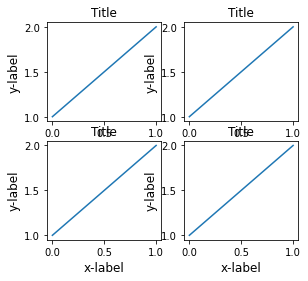

In [4]:
fig, axs = plt.subplots(2, 2, layout=None)
for ax in axs.flat:
    example_plot(ax)

시각화 결과물을 확인해보면 각 시각 객체가 margin 이 부족하여 축이름이 겹쳐있음을 확인할 수 있습니다 이를 해결하기 위해서 subplots의 layout 옵션을 사용할 수 있습니다. 옵션의 값을 'constrained'로 입력해주면 축이름이 겹치지 않도록 레이아웃을 조정할 수 있습니다.

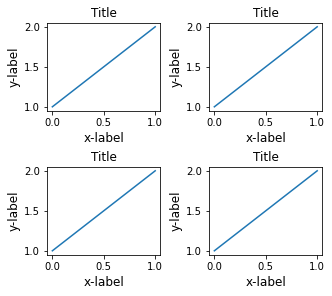

In [5]:
fig, axs = plt.subplots(2, 2, layout="constrained")
for ax in axs.flat:
    example_plot(ax)

하나의 축이 범주형 변수인 경우 값의 이름을 직접 지정할 수 있을까요? ticks에 label옵션을 사용합니다.

아래 예를 보면 'Frogs', 'Hogs', 'Bogs', 'Slogs' 개체의 어떤 관측값이 1, 4, 9, 6인 상황을 가정합니다. 이 값은 y로 저장되어 있습니다. 여기서 x는 단순히 순서를 나타내는 것이고 시각화 객체의 x축위에서 위치를 나타내는 용도로 사용할 예정입니다. 

하지만 x축위에서 숫자로 데이터를 표시하기 보다는 원래 값인 'Frogs', 'Hogs', 'Bogs', 'Slogs' 싶은 것이지요. 

이 때 set_xticks(위치, 라벨)을 사용합니다. 아래 예를 확인해봅시다.

Text(0.5, 1.0, 'ticks label')

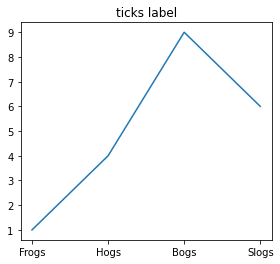

In [6]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xticks(x, labels)
ax.set_title("ticks label")

축에 표시된 이름을 회전할 수도 있을까요? 이 이름이 짧은 경우는 문제가 없습니다만, 이름이 긴 경우에 바로 옆에 있는 이름들과 겹칠 가능성이 큽니다. 특히 날짜를 표시하는 경우 흔하게 발생하는 문제이기도 합니다. 여기서는 xticks의 rotation 옵션을 사용하여 문제를 해결하였습니다.

TIPS! 시계열자료에서 날짜를 가로축에 표시해야하는 경우 xticks의 rotation = 'vertical'을 이용하여 표시해봅시다.  

Text(0.5, 1.0, 'ticks label')

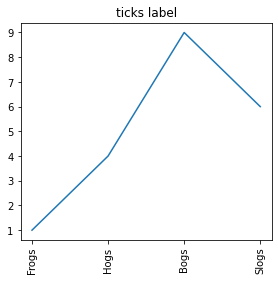

In [7]:
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xticks(x, labels, rotation='vertical')
ax.set_title("ticks label")

yticks를 지정해서 y축에 표시된 ticks 값을 변경할 수도 있습니다. 아래 예에서 set_yticks 로 지정한 부분을 살펴봅시다. 

Text(0.5, 1.0, 'ticks label')

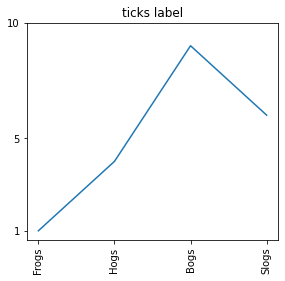

In [8]:
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xticks(x, labels, rotation='vertical')
ax.set_yticks([1,5,10], [1,5,10])
ax.set_title("ticks label")

Margin의 개념
- figure 내부에 axes 개체 속성을 조정하여 그림을 그립니다.
- axes 의 ylim, xlim을 이용하여 축을 조정할 수 있습니다.
- ylim과 xlim을 직접 지정하기 않고 데이터의 범위 (최대값과 최소값의 차이)의 배율로 축을 조정할 수 있습니다. 이 옵션이 magins 입니다.
- 아래 ax.margins 이 사용된 예를 살펴봅시다. 


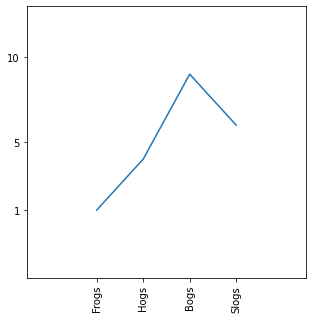

In [9]:
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(x,y)
ax.set_xticks(x, labels, rotation='vertical')
ax.set_yticks([1,5,10], [1,5,10])
ax.margins(x = .5, y = .5)

앞서 살펴본 set_title 에 사용할 수 있는 옵션들을 살펴보겠습니다. 
- 기본적으로 text 함수에서 사용하는 모든 옵션을 조정할 수 있습니다
    - **kwargs : Text properties. Other keyword arguments are text properties, see Text for a list of valid text properties.
    - x, y 의 경우 가로, 세로축의 양끝점을 0, 1로 잡고 그 위치를 지정할 수 있습니다. 음수값도 허용합니다. set_title에서 x,y 옵션의 값을 조정하면서 효과를 확인해보세요.
- fontsize: 글자크기

Text(0.1, 0.5, 'Title: A')

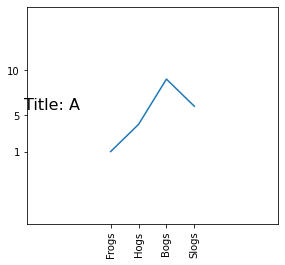

In [18]:
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xticks(x, labels, rotation='vertical')
ax.set_yticks([1,5,10], [1,5,10])
ax.margins(x = 1, y = 1)
ax.set_title("Title: A", x=0.1, y=0.5,  fontsize = 16)

레이아웃은 subplots 함수를 이용해서 nrows, ncols 옵션을 이용해서 정할 수 있습니다. 이 방법은 격자형태의 레이아웃만 구현 가능합니다. 다양한 레이아웃을 만들기 위해서는 ***subplot*** 함수를 사용합니다.
- subplot 함수는 
- (nrows, ncols, index): 여기서 index는 상단 좌측으로 부터 우측으로 갈 수록 1씩 증가합니다. 최상단 좌측이 index값 1입니다.
- subplot(2,2,2)는 행과 열이 2개인 격자 레이아웃에서 오른쪽 위 격자를 가르킵니다.

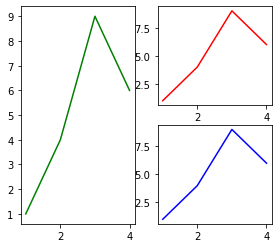

In [23]:
ax1 = plt.subplot(2,2,2)
ax2 = plt.subplot(2,2,4)
ax3 = plt.subplot(1,2,1)
ax1.plot(x,y, color='red')
ax2.plot(x,y, color='blue')
ax3.plot(x,y, color='green')

레이아웃을 전체 그림에서 2/3, 1/3 을 가지도록 자를 수 있을까요? 

레이아웃을 세등분한 다음 첫 번째 그림은 index 1번과 2번, 두 번째 그림을 3번을 선택하여 그리면 가능할텐데요. 이것이 index에 튜플을 이용해서 구현되어 있습니다. index값에 (1,2)라 쓰면 1번과 2번 index를 사용할 수 있습니다.

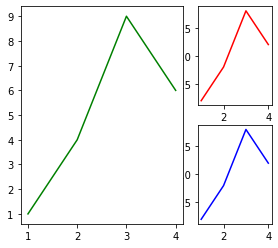

In [25]:
ax1 = plt.subplot(2,3,3)
ax2 = plt.subplot(2,3,6)
ax3 = plt.subplot(1,3,(1,2))
ax1.plot(x,y, color='red')
ax2.plot(x,y, color='blue')
ax3.plot(x,y, color='green')